In [89]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def convert_to_float(value):
    """
    Transforms argument value to float;
    Replaces the comma in a string variable with a dot and rounds the value to two decimal places;
    
    Parameters
    --------
    value: float
    
    Returns
    --------
    float
    
    """
    value = float(str(value).replace(",", "."))
    value = round(value, 2)
    return value

#######################################################################################################################

## Подготовка данных

In [59]:
# Загрузка датафрейма из CSV файла;
textiles = pd.read_csv('../data/textiles.csv', sep=';')

In [60]:
# Приведение типов колонок датафрейма к значению с плавающей запятой;
textiles['warp_a'] = textiles.warp_a.apply(convert_to_float)
textiles['warp_b'] = textiles.warp_b.apply(convert_to_float)
textiles['weft_a'] = textiles.weft_a.apply(convert_to_float)
textiles['weft_b'] = textiles.weft_b.apply(convert_to_float)
textiles['warp_thick_mean'] = textiles.warp_thick_mean.apply(convert_to_float)
textiles['weft_mean'] = textiles.weft_mean.apply(convert_to_float)
textiles['warp_dens'] = textiles.warp_dens.apply(convert_to_float)
textiles['weft_dens'] = textiles.weft_dens.apply(convert_to_float)

# Вычисление "усредненных" толщин нитей;
textiles['warp_nominal'] = round((textiles['warp_a'] + textiles['warp_b']) / 2, 2)
textiles['weft_nominal'] = round((textiles['weft_a'] + textiles['weft_b']) / 2, 2)

### Вычисление квартилей толщин и плотностей по основе и утку

In [43]:
#######################################################################################################################
# Получаемые квартили записываются в словарь со следующими ключами:
#
# Квартили толщин нитей по основе и утку;
# quartiles['thick']:
#    1 - quartiles['thick']['warp']
#    2 - quartiles['thick']['weft']
#
#######################################################################################################################
#
# Квартили плотностей ткани по основе и утку;
# quartiles['dens']:
#    1 - quartiles['dens']['warp']
#    2 - quartiles['dens']['weft']
#
#######################################################################################################################

quartiles = {
    'thick': {
        'warp': None,
        'weft': None,
    },
    'dens': {
        'warp': None,
        'weft': None,
    }
}

In [68]:
# Получаем квартили толщин нитей основы и утка;
quartiles['thick']['warp'] = dict(textiles['warp_nominal'].quantile([0.25, 0.5, 0.75]))
quartiles['thick']['weft'] = dict(textiles['weft_nominal'].quantile([0.25, 0.5, 0.75]))

# Получаем квартили плотностей по основе и утку;
quartiles['dens']['warp'] = dict(textiles['warp_dens'].quantile([0.25, 0.5, 0.75]))
quartiles['dens']['weft'] = dict(textiles['weft_dens'].quantile([0.25, 0.5, 0.75]))

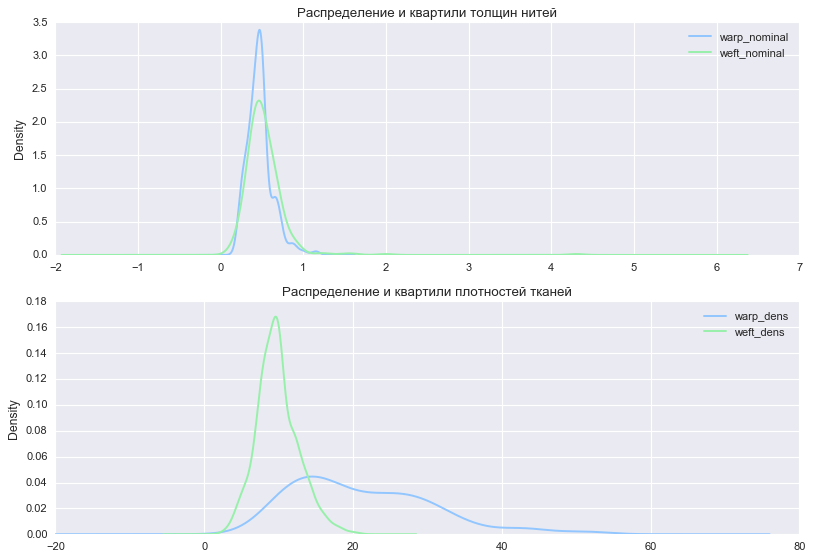

In [120]:
matplotlib.style.use('seaborn-pastel')

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].set_title('Распределение и квартили толщин нитей')
ax[1].set_title('Распределение и квартили плотностей тканей')

textiles.warp_nominal.plot.kde(ax=ax[0])
textiles.weft_nominal.plot.kde(ax=ax[0])
ax[0].legend()

textiles.warp_dens.plot.kde(ax=ax[1])
textiles.weft_dens.plot.kde(ax=ax[1])
ax[1].legend()

plt.show()

## Исследование "выбросов" в данных

Под "выбросами" подразумеваются экземпляры данных с аномально отклоняющимися от средних величин выборки значениями тех  
или иных параметров

In [135]:
# Описание получаемых переменных:
#
# cleared['thick'] - датафрейм, очищенный от выбросов по толщине
# cleared['dens'] - датафрейм, очищенный от выбросов по плотности

cleared = {
    'thick': None,
    'dens': None,
}

In [138]:
# Выбросы по толщинам нитей по основе;
cleared['thick'] = \
    textiles[textiles.warp_nominal < 
             (quartile_thick_warp_3 + 1.5 * (quartile_thick_warp_3 + quartile_thick_warp_1))]
cleared['thick'] = cleared['thick'][cleared['thick'].warp_nominal > 
                     (quartile_thick_warp_1 - 1.5 * (quartile_thick_warp_3 - quartile_thick_warp_1))]

In [8]:

########################################################################################################################

textiles_cleared_thick.to_csv('../output/cleared/thick.csv')

########################################################################################################################

# Выбросы по плотности ткани по основе;
textiles_cleared_dens = \
    textiles[textiles.warp_dens <
             (quartile_dens_warp_1 + 1.5 * (quartile_dens_warp_3 - quartile_dens_warp_1))]

textiles_cleared_dens = \
    textiles_cleared_dens[textiles_cleared_dens.warp_dens >
                          (quartile_dens_weft_1 - 1.5 * (quartile_dens_weft_3 - quartile_dens_weft_1))]

textiles_cleared_dens = \
    textiles_cleared_dens[textiles_cleared_dens.weft_dens <
                          (quartile_dens_weft_1 + 1.5 * (quartile_dens_weft_3 - quartile_dens_weft_1))]

textiles_cleared_dens = \
    textiles_cleared_dens[textiles_cleared_dens.weft_dens >
                          (quartile_dens_weft_1 - 1.5 * (quartile_dens_weft_3 - quartile_dens_weft_1))]

########################################################################################################################

textiles_cleared_dens.to_csv('../output/cleared/dens.csv')

########################################################################################################################

textiles_cleared = \
    textiles[textiles.warp_nominal < 
             (quartile_thick_warp_3 + 1.5 * (quartile_thick_warp_3 + quartile_thick_warp_1))]
textiles_cleared = \
    textiles_cleared[textiles_cleared.warp_nominal > 
                     (quartile_thick_warp_1 - 1.5 * (quartile_thick_warp_3 - quartile_thick_warp_1))]

textiles_cleared = \
    textiles_cleared[textiles_cleared.warp_dens <
             (quartile_dens_warp_1 + 1.5 * (quartile_dens_warp_3 - quartile_dens_warp_1))]

textiles_cleared = \
    textiles_cleared[textiles_cleared.warp_dens >
                          (quartile_dens_weft_1 - 1.5 * (quartile_dens_weft_3 - quartile_dens_weft_1))]

textiles_cleared = \
    textiles_cleared[textiles_cleared.weft_dens <
                          (quartile_dens_weft_1 + 1.5 * (quartile_dens_weft_3 - quartile_dens_weft_1))]

textiles_cleared = \
    textiles_cleared[textiles_cleared.weft_dens >
                          (quartile_dens_weft_1 - 1.5 * (quartile_dens_weft_3 - quartile_dens_weft_1))]

########################################################################################################################

textiles_cleared.to_csv('../output/textiles_cleared.csv')

########################################################################################################################

# Датафрейм - только выбросы по толщинам нитей по основе;
outliers_thick = textiles[~textiles.index.isin(textiles_cleared_thick.index)]
outliers_dens = textiles[~textiles.index.isin(textiles_cleared_dens.index)]

########################################################################################################################

print()
print("Выбросов по толщине нити - " + str(len(outliers_thick)))
print("Выбросов по плотности тканей - " + str(len(outliers_dens)))
print("Размерность набора данных без учета выбросов - " + str(len(textiles_cleared)))
print()
print()


Выбросов по толщине нити - 26
Выбросов по плотности тканей - 48
Размерность набора данных без учета выбросов - 244




['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


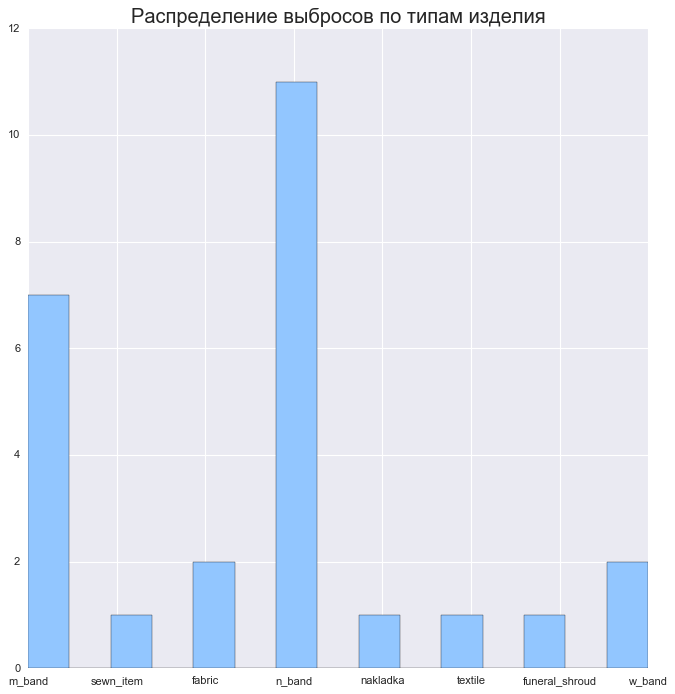

In [134]:
print(matplotlib.style.available)
matplotlib.style.use('seaborn-pastel')

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Распределение выбросов по типам изделия', fontsize=18)
outliers_thick.type.hist(ax=ax, bins=15)
plt.show()